In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

# Reading of Input Data

In [6]:
input_data=pd.read_csv("D:\\work\\Learnings\\Machine_Learning\\Model_Explanability\\Regression-Analysis-Data.csv")
input_data.head()

Observation  Dist_Taxi  Dist_Market  Dist_Hospital  Carpet  Builtup  \
0            1     9796.0       5250.0        10703.0  1659.0   1961.0   
1            2     8294.0       8186.0        12694.0  1461.0   1752.0   
2            3    11001.0      14399.0        16991.0  1340.0   1609.0   
3            4     8301.0      11188.0        12289.0  1451.0   1748.0   
4            5    10510.0      12629.0        13921.0  1770.0   2111.0   

        Parking City_Category  Rainfall  House_Price  
0          Open         CAT B       530      6649000  
1  Not Provided         CAT B       210      3982000  
2  Not Provided         CAT A       720      5401000  
3       Covered         CAT B       620      5373000  
4  Not Provided         CAT B       450      4662000

In [3]:
#get the statistics summary for numeric variables
input_data.describe()

Observation     Dist_Taxi   Dist_Market  Dist_Hospital        Carpet  \
count   932.000000    919.000000    919.000000     931.000000    924.000000   
mean    466.500000   8229.727965  11018.752992   13072.092374   1511.862554   
std     269.189524   2561.985008   2543.920590    2586.456161    790.969660   
min       1.000000    146.000000   1666.000000    3227.000000    775.000000   
25%     233.750000   6476.000000   9354.500000   11301.500000   1318.000000   
50%     466.500000   8230.000000  11161.000000   13163.000000   1480.500000   
75%     699.250000   9937.000000  12670.500000   14817.000000   1655.000000   
max     932.000000  20662.000000  20945.000000   23294.000000  24300.000000   

            Builtup     Rainfall   House_Price  
count    917.000000   932.000000  9.320000e+02  
mean    1794.924755   785.579399  6.084695e+06  
std      468.159457   265.546853  5.025364e+06  
min      932.000000  -110.000000  3.000000e+04  
25%     1583.000000   600.000000  4.658000e+06  
50%     1774.000000   780.000000  5.866000e+06  
75%     1982.000000   970.000000  7.187250e+06  
max    12730.000000  1560.000000  1.500000e+08

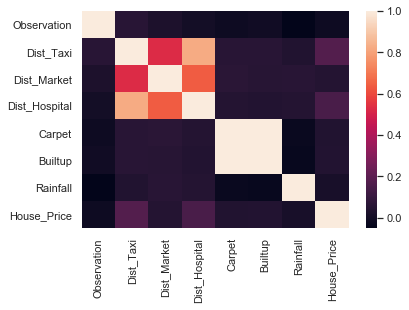

In [4]:
input_data['City_Category'].unique()
input_data['Parking'].value_counts()
sns.heatmap(input_data[(input_data['City_Category']=='CAT A') & 
                       (input_data['Parking'].isin(['Not Provided','No Parking']))].corr())
#sns.heatmap(input_data[input_data['City_Category']=='CAT C'].corr())

In [7]:
import plotly.express as px

feature_names = ['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet',
       'Builtup', 'Rainfall']

for feature_to_plot in feature_names :
    print(feature_to_plot+ " vs House_Price")
    fig = px.scatter(input_data, x=feature_to_plot, y='House_Price', hover_data=['Observation'],
                     color="City_Category")
    fig.show()

Dist_Taxi vs House_Price


Dist_Market vs House_Price


Dist_Hospital vs House_Price


Carpet vs House_Price


Builtup vs House_Price


Rainfall vs House_Price


# Data Prepration

In [8]:
input_data=input_data.dropna()
input_data= input_data[input_data['Observation']!=361]

In [15]:
city_dummy= pd.get_dummies(input_data['City_Category'])
city_dummy.columns=['City_Category:'+s for s in city_dummy.columns ]
#city_dummy.reset_index(drop=True, inplace=True)

input_data.loc[input_data['Parking']=='Not Provided','Parking']= 'No Parking'  
parking_dummy= pd.get_dummies(input_data['Parking'])
parking_dummy.columns=['Parking:'+s for s in parking_dummy.columns ]
#parking_dummy.reset_index(drop=True, inplace=True)

input_data= pd.concat([input_data ,city_dummy,parking_dummy], axis=1)
input_data

Observation  Dist_Taxi  Dist_Market  Dist_Hospital  Carpet  Builtup  \
0              1     9796.0       5250.0        10703.0  1659.0   1961.0   
1              2     8294.0       8186.0        12694.0  1461.0   1752.0   
2              3    11001.0      14399.0        16991.0  1340.0   1609.0   
3              4     8301.0      11188.0        12289.0  1451.0   1748.0   
4              5    10510.0      12629.0        13921.0  1770.0   2111.0   
..           ...        ...          ...            ...     ...      ...   
927          928    12176.0       8518.0        15673.0  1582.0   1910.0   
928          929     7214.0       8717.0        10553.0  1387.0   1663.0   
929          930     7423.0      11708.0        13220.0  1200.0   1436.0   
930          931    15082.0      14700.0        19617.0  1299.0   1560.0   
931          932     9297.0      12537.0        14418.0  1174.0   1429.0   

        Parking City_Category  Rainfall  House_Price  City_Category:CAT A  \
0          Open         CAT B       530      6649000                    0   
1    No Parking         CAT B       210      3982000                    0   
2    No Parking         CAT A       720      5401000                    1   
3       Covered         CAT B       620      5373000                    0   
4    No Parking         CAT B       450      4662000                    0   
..          ...           ...       ...          ...                  ...   
927     Covered         CAT C      1080      6639000                    0   
928        Open         CAT A       850      8208000                    1   
929        Open         CAT A      1060      7644000                    1   
930        Open         CAT B       770      9661000                    0   
931     Covered         CAT C      1110      5434000                    0   

     City_Category:CAT B  City_Category:CAT C  Parking:Covered  \
0                      1                    0                0   
1                      1                    0                0   
2                      0                    0                0   
3                      1                    0                1   
4                      1                    0                0   
..                   ...                  ...              ...   
927                    0                    1                1   
928                    0                    0                0   
929                    0                    0                0   
930                    1                    0                0   
931                    0                    1                1   

     Parking:No Parking  Parking:Open  
0                     0             1  
1                     1             0  
2                     1             0  
3                     0             0  
4                     1             0  
..                  ...           ...  
927                   0             0  
928                   0             1  
929                   0             1  
930                   0             1  
931                   0             0  

[897 rows x 16 columns]

In [16]:
input_data.columns

Index(['Observation', 'Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet',
       'Builtup', 'Parking', 'City_Category', 'Rainfall', 'House_Price',
       'City_Category:CAT A', 'City_Category:CAT B', 'City_Category:CAT C',
       'Parking:Covered', 'Parking:No Parking', 'Parking:Open'],
      dtype='object')

# Model Building

In [17]:
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(input_data, test_size=0.3)

In [18]:
train_y = traindata['House_Price'] # Convert from string "Yes"/"No" to binary
feature_names = ['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet',
       'Builtup', 'Rainfall','City_Category:CAT A', 'City_Category:CAT B', 'City_Category:CAT C',
       'Parking:Covered', 'Parking:No Parking', 'Parking:Open']
train_X = traindata[feature_names]

from sklearn.ensemble import RandomForestRegressor
my_model = RandomForestRegressor(n_estimators=100, random_state=0).fit(train_X, train_y)

In [19]:
#To get the variable importance
coef = pd.Series(my_model.feature_importances_,train_X.columns).sort_values()
print(coef)

Parking:Open           0.008286
Parking:Covered        0.011541
Parking:No Parking     0.012915
City_Category:CAT C    0.029580
City_Category:CAT B    0.035002
Carpet                 0.061601
Builtup                0.076161
Rainfall               0.077959
Dist_Market            0.088438
Dist_Hospital          0.097521
Dist_Taxi              0.102329
City_Category:CAT A    0.398668
dtype: float64


In [20]:
val_y = testdata['House_Price'] 
val_X = testdata[feature_names]

In [21]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

C:\Users\hag5kor\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

C:\Users\hag5kor\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.

Using TensorFlow backend.


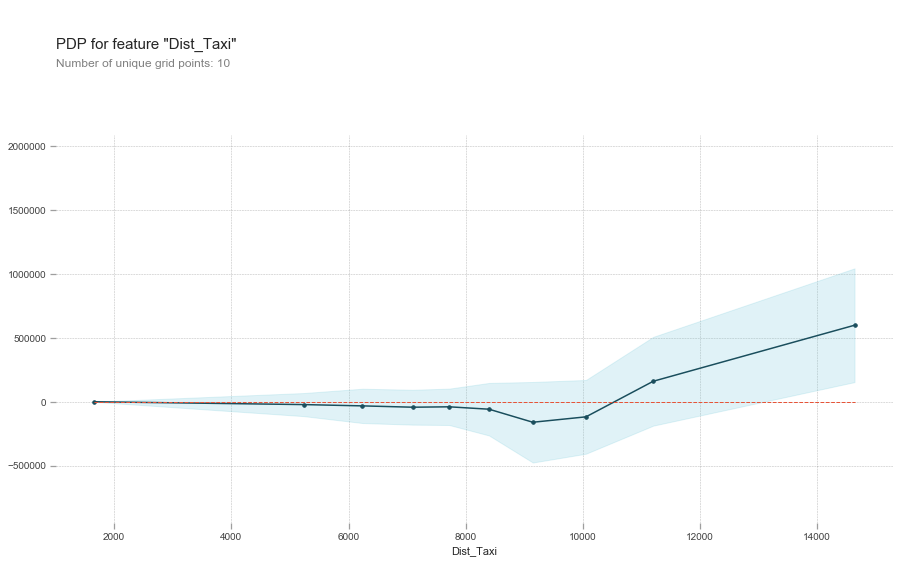

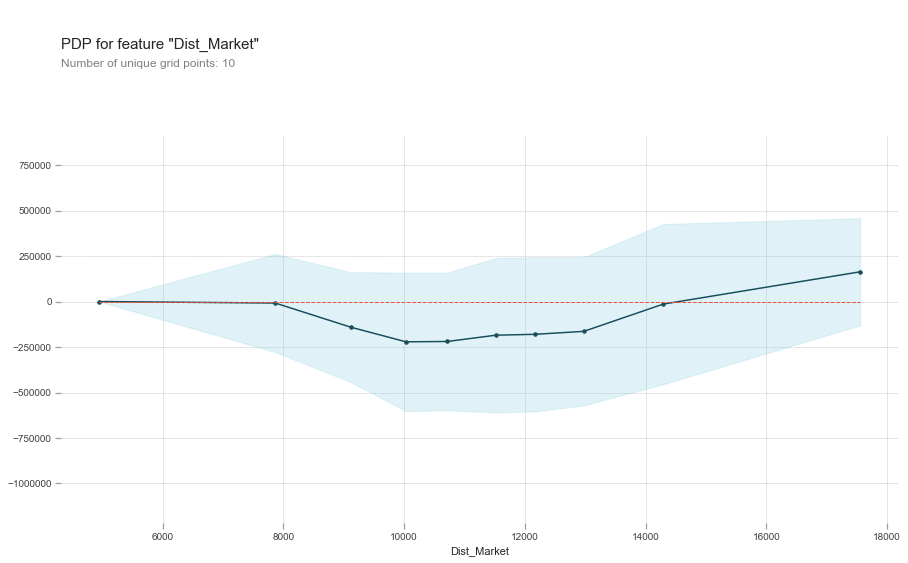

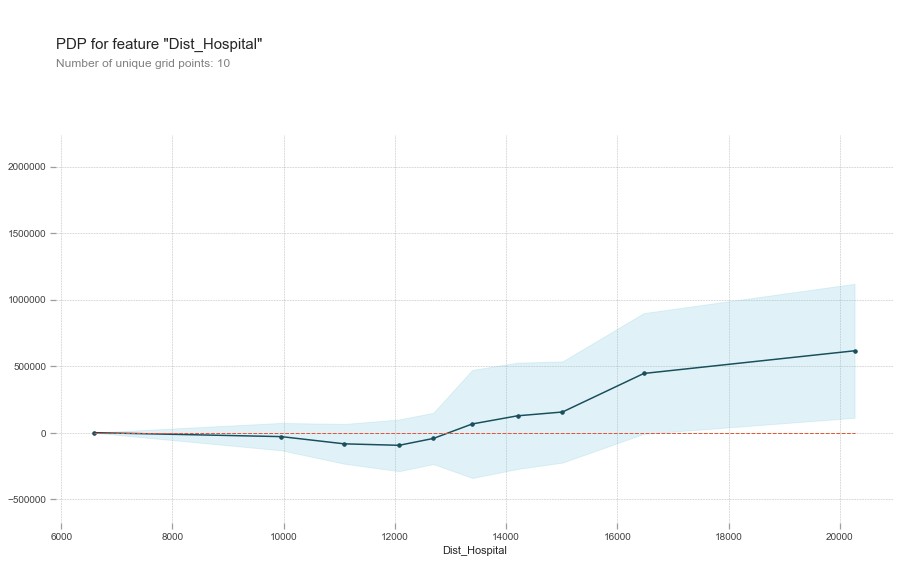

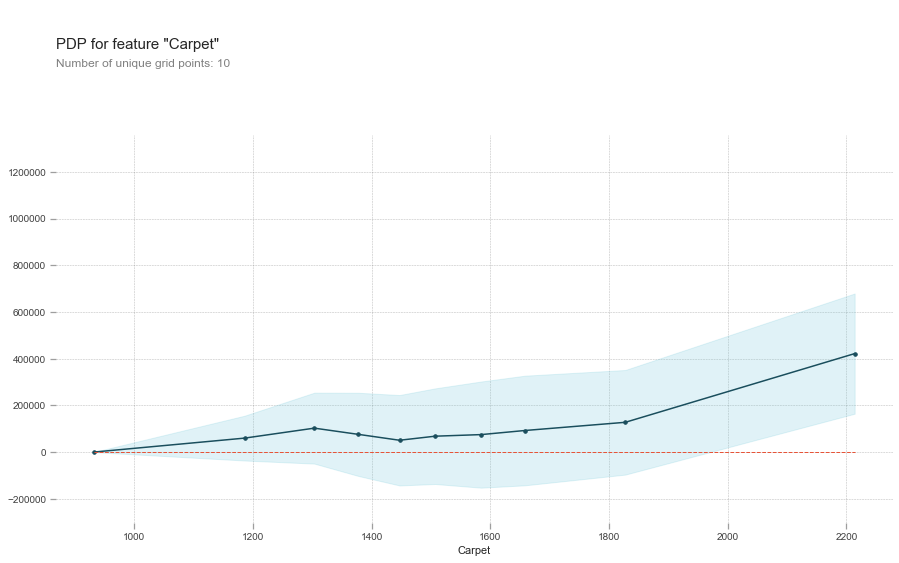

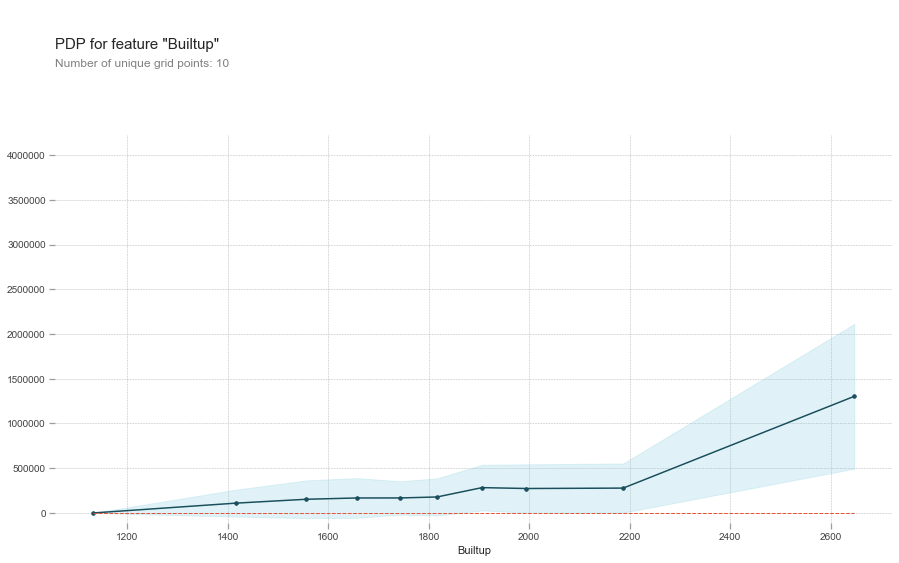

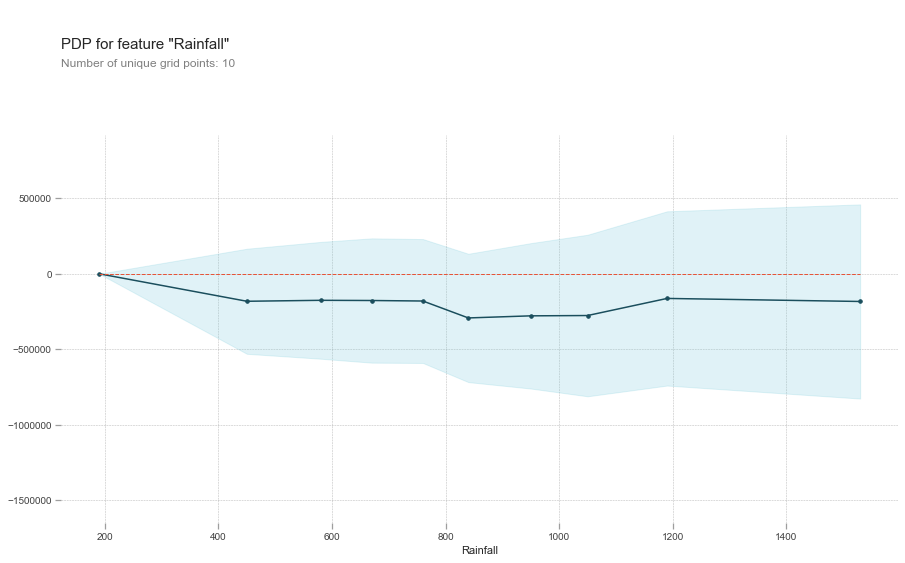

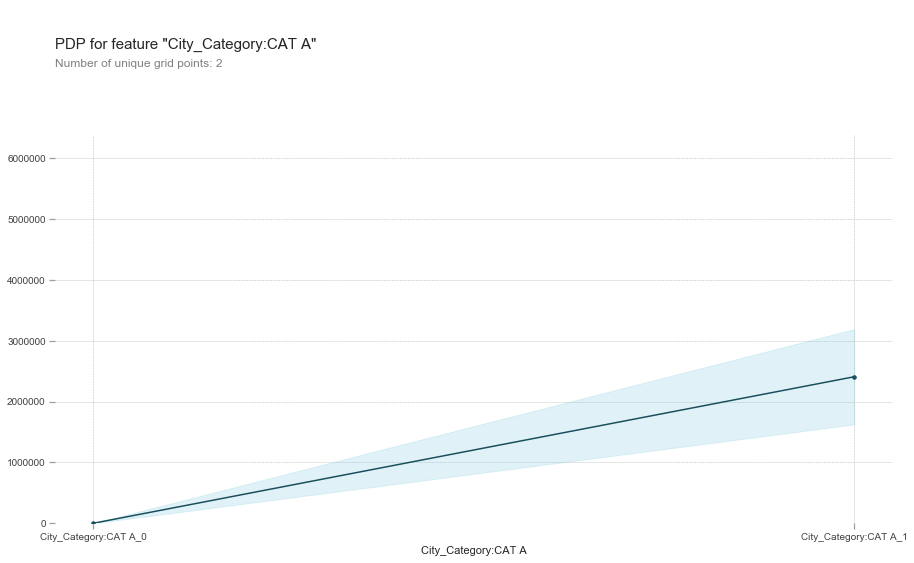

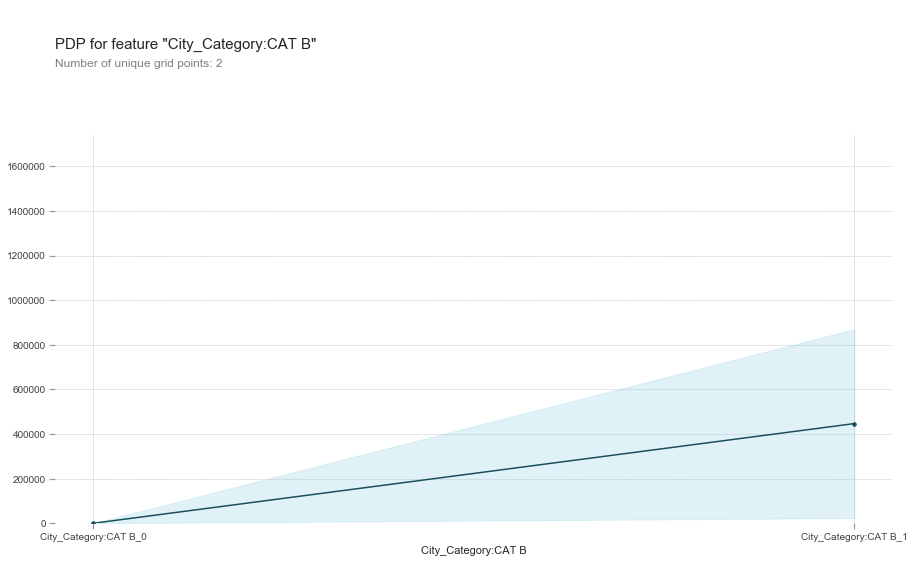

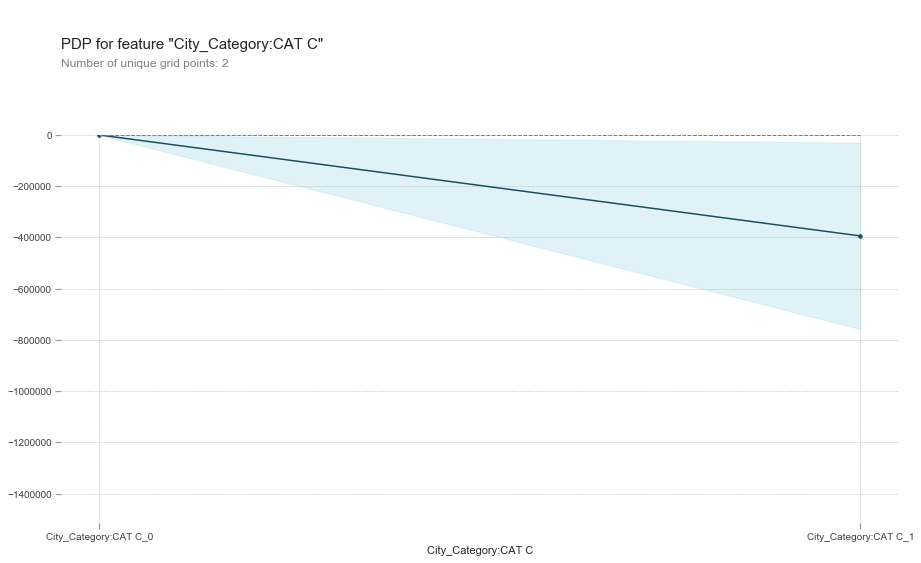

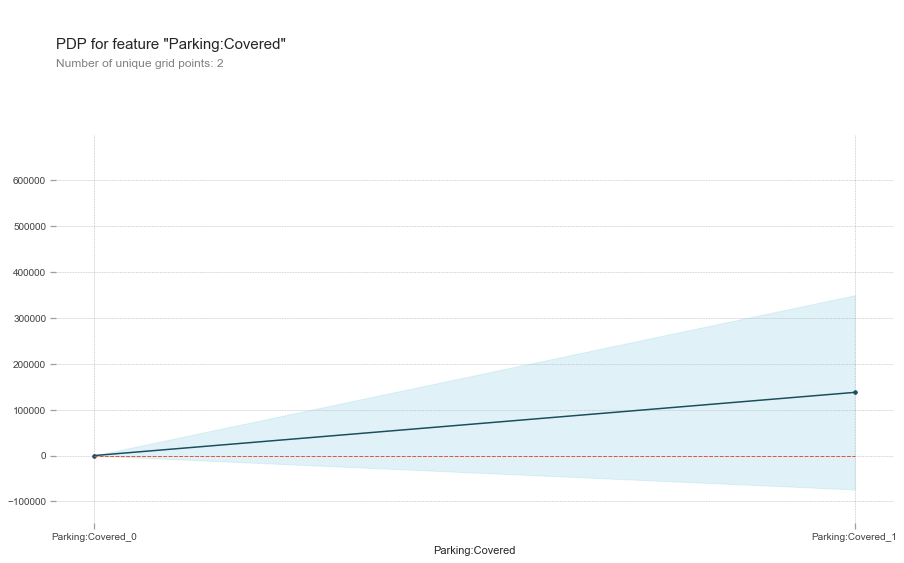

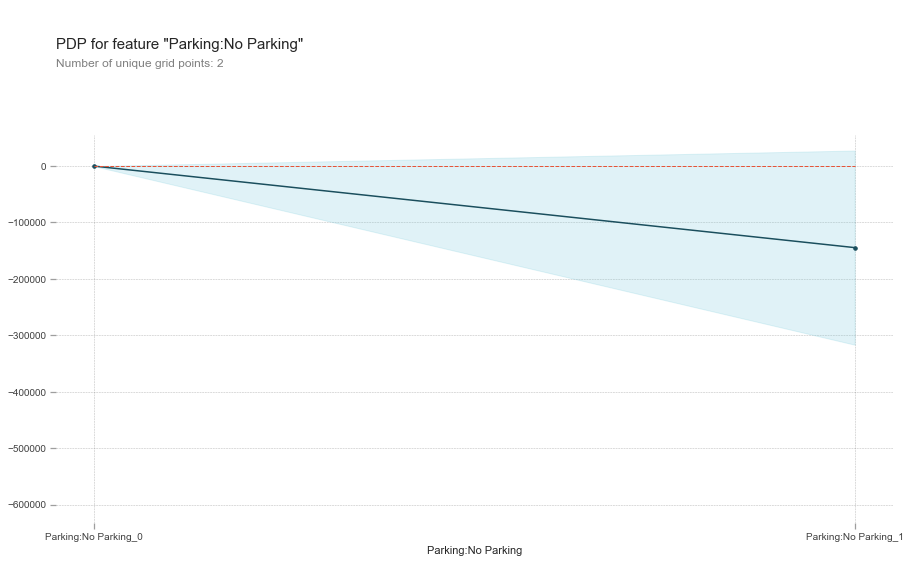

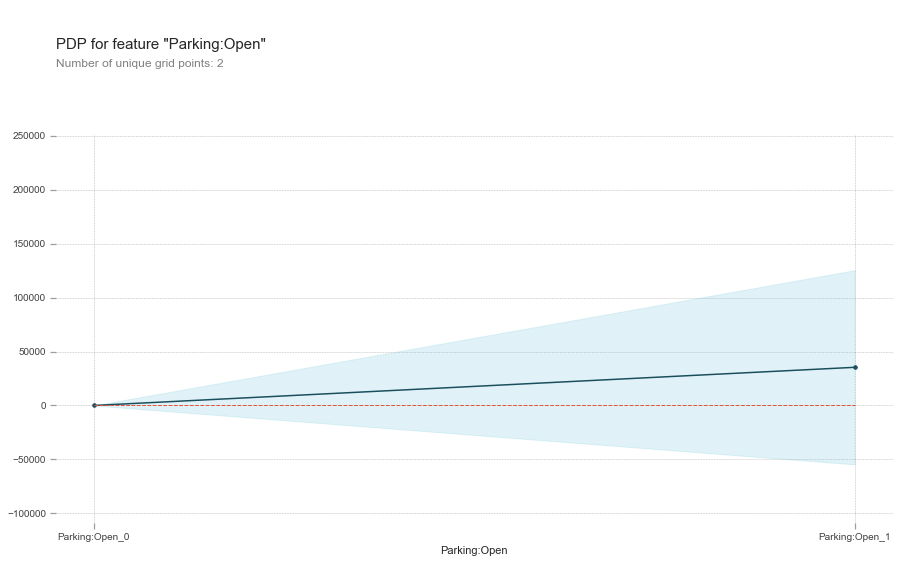

In [22]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

for feature_to_plot in feature_names :
    pdp_dist = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)
    pdp.pdp_plot(pdp_dist, feature_to_plot)
    plt.show()


In [21]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


my_model.predict(data_for_prediction_array)

import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [22]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

In [ ]:
# use Kernel SHAP to explain test set predictions
k_explainer = shap.KernelExplainer(my_model.predict, train_X)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value, k_shap_values, data_for_prediction)

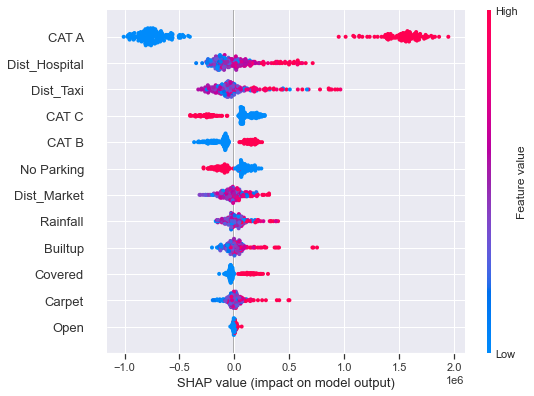

In [23]:
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, val_X)

In [24]:
len(shap_values[1])

12

In [25]:
feature_names

['Dist_Taxi',
 'Dist_Market',
 'Dist_Hospital',
 'Carpet',
 'Builtup',
 'Rainfall',
 'CAT A',
 'CAT B',
 'CAT C',
 'Covered',
 'No Parking',
 'Open']

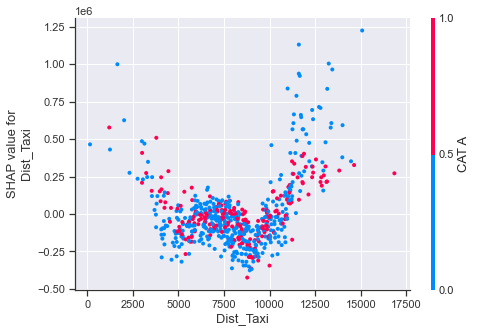

In [27]:
# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(train_X)

# make plot.
shap.dependence_plot('Dist_Taxi', shap_values, train_X, interaction_index="CAT A")

In [ ]:
input_data.columns